Epoch 1/10
250/250 [==============================] - 5s 6ms/step - loss: 0.4131 - accuracy: 0.8786 - val_loss: 0.1211 - val_accuracy: 0.9665
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0964 - accuracy: 0.9702 - val_loss: 0.0795 - val_accuracy: 0.9725
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9811 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0388 - accuracy: 0.9865 - val_loss: 0.0612 - val_accuracy: 0.9800
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0741 - val_accuracy: 0.9800
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0756 - val_accuracy: 0.9780
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.1038 - val_accuracy: 0.9710
Epoch 

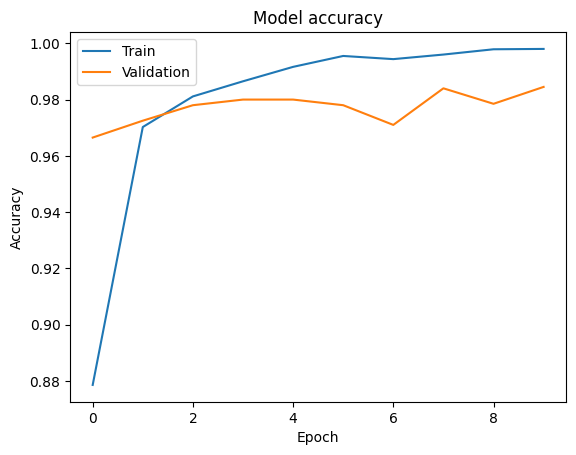

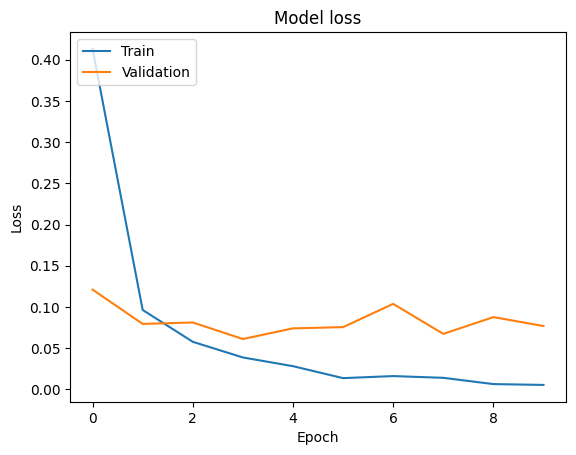

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/mnist_test.csv')
test_df = pd.read_csv('/content/mnist_train.csv')

# Separate features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the CNN model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()